<a href="https://colab.research.google.com/github/abhinand5/100-days-of-code/blob/master/Planets_Classifier_fastai_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from fastai.vision import *
from fastai.callbacks import SaveModelCallback

# Data Prep

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_dir = '../content/drive/My Drive/data/planets-dataset-v1'

In [5]:
os.listdir(data_dir)

['saturn', 'mercury', 'jupiter', 'earth', 'venus', 'mars', 'uranus', 'neptune']

In [0]:
# !mkdir planets-dataset
# !cp -r '../content/drive/My Drive/data/planets-dataset-v1/' 'planets-dataset/'

In [0]:
np.random.seed(12)

# Creating Data Bunch

In [0]:
tfms = get_transforms(do_flip=True)

In [0]:
data = ImageDataBunch.from_folder(data_dir, train='.', 
                                  valid_pct=0.2, 
                                  ds_tfms=tfms, 
                                  size=256, 
                                  num_workers=4,
                                  bs=32).normalize(imagenet_stats)

In [10]:
data.classes

['earth', 'jupiter', 'mars', 'mercury', 'neptune', 'saturn', 'uranus', 'venus']

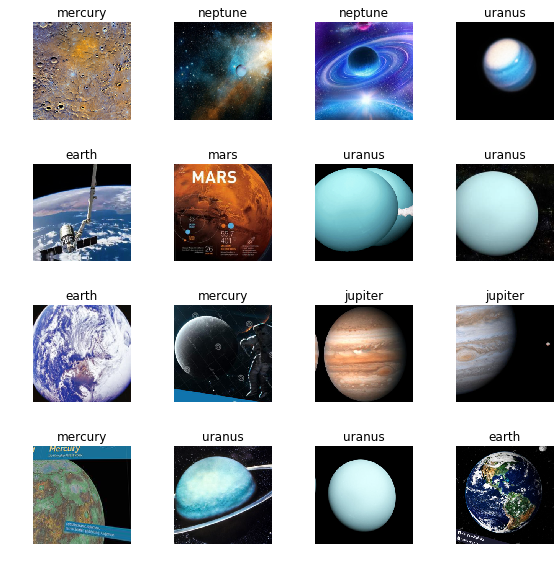

In [11]:
data.show_batch(rows=4, figsize=(8,8))

# Training 

In [0]:
learner = cnn_learner(data, models.resnet50, pretrained=True, metrics=accuracy,ps=0.3)

In [24]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [0]:
learner.model_dir = Path('/content/models')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.45E-02


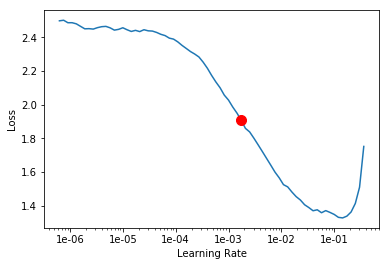

In [26]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [27]:
learner.fit_one_cycle(3, slice(1.74e-03, 1.45e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.888329,0.860213,0.775000,00:18
1,0.620445,0.528546,0.875000,00:18
2,0.417711,0.403242,0.891667,00:17


In [0]:
learner.save('rn50-stage-1-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.58E-05


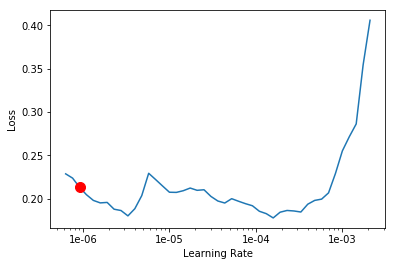

In [29]:
learner.load('rn50-stage-1-2')
learner.unfreeze()

learner.lr_find()
learner.recorder.plot(suggestion=True)

In [30]:
learner.fit_one_cycle(20, slice(9.12e-07, 1.58e-05),
                      callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name='rn50-best-2')])

epoch,train_loss,valid_loss,accuracy,time
0,0.199553,0.394880,0.891667,00:19
1,0.202868,0.389673,0.904167,00:19
2,0.196890,0.396454,0.900000,00:19
3,0.188928,0.381719,0.904167,00:19
4,0.172085,0.376103,0.904167,00:19
5,0.169063,0.376620,0.908333,00:19
6,0.152200,0.371011,0.912500,00:19
7,0.137353,0.378159,0.908333,00:19
8,0.125670,0.371075,0.908333,00:19
9,0.111450,0.366338,0.908333,00:19


Better model found at epoch 0 with accuracy value: 0.8916666507720947.
Better model found at epoch 1 with accuracy value: 0.9041666388511658.
Better model found at epoch 5 with accuracy value: 0.9083333611488342.
Better model found at epoch 6 with accuracy value: 0.9125000238418579.


In [0]:
learner.save('rn50-stage-2-2')

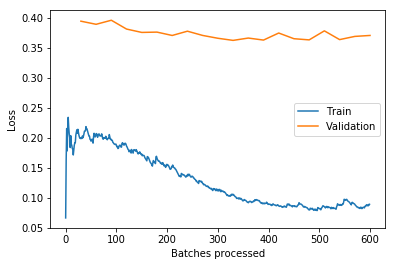

In [32]:
learner.recorder.plot_losses()

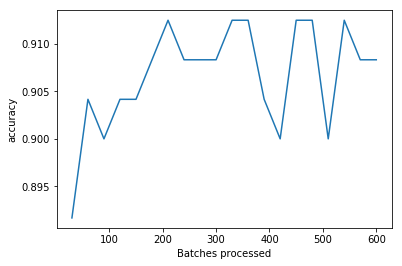

In [33]:
learner.recorder.plot_metrics()

# Predictions on Validation set

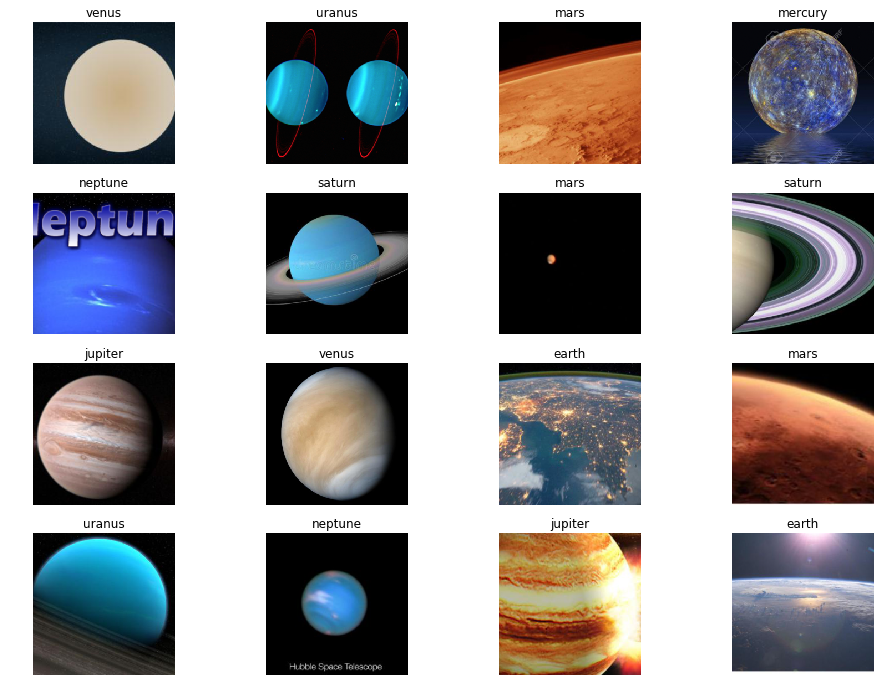

In [37]:
learner.load('rn50-stage-2-2')
_, axs = plt.subplots(4,4,figsize=(16,12))
idx = 180
for ax in axs.flatten():
  img = learner.data.valid_ds[idx][0]
  img.show(ax, y=learner.predict(img)[0])
  idx += 1

In [43]:
!zip -r models.zip models

updating: models/ (stored 0%)
  adding: models/rn50-stage-1.pth (deflated 7%)
  adding: models/rn50-stage-1-2.pth (deflated 7%)
  adding: models/rn50-stage-2-2.pth (deflated 8%)
  adding: models/rn34-stage-1.pth (deflated 7%)
  adding: models/rn34-stage-2.pth (deflated 8%)
  adding: models/rn50-best-2.pth (deflated 8%)
  adding: models/tmp.pth (deflated 7%)
  adding: models/best.pth (deflated 8%)


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [45]:
uploaded = drive.CreateFile({'title': 'models.zip'})
uploaded.SetContentFile('models.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1hlrgqCVwBBr-DaALJE118_MjSSYi_eYr
